In [1]:
import numpy as np
from scipy import sparse
from scipy.linalg import solve
import matplotlib.pyplot as plt
from PIL import Image
from copy import deepcopy

In [21]:
class ALS(object):
    
    def __init__(self, k=10, lambda_ = 10, max_iter=1000, tol=1e-5, missed_val = 'NaN'):
        self._k = k
        self._lambda = lambda_
        self._max_iter = max_iter
        self._tol = tol
        self._missed_val = missed_val
    
    def fit(self, ratings):
        #initial assigning of factors X, Y
        X, Y = np.abs(np.random.rand(self._k, ratings.shape[0])), np.abs(np.random.rand(self._k, ratings.shape[1]))
            
        if self._missed_val == 'NaN':
            
            for i in range(self._max_iter):
                column_diff_norm = 0
                print(i)
                
                #flag shows that X and Y changed much, so we should not stop
                flag = True
                
                for j in range(ratings.shape[0]):
                    #take row in matrix of observations with which we will work
                    row = ratings.getrow(j).toarray().ravel()
                    
                    #find arguments of elemnts in row which were not missed
                    args = np.argwhere(~np.isnan(row)).T[0]
                    
                    #create matrices to save temporary results
                    summation_inv = np.zeros((self._k, self._k))
                    summation = np.zeros((self._k, 1))
                    
                    #for every non-nan element in row we take corresponding column of Y and make manipulations
                    for arg in args:
                        summation_inv = summation_inv + (Y[:, arg].reshape(-1,1)).dot(Y[:, arg].reshape(1, -1))
                        summation = summation + row[arg] * Y[:, arg].reshape(-1,1)

                    #update the corresponding column of X
                    new_X = solve(summation_inv + self._lambda * np.eye(self._k), summation)
                    column_diff_norm += np.linalg.norm(X[:,j] - new_X) / np.linalg.norm(X[:,j])
                    X[:,j] = new_X.reshape(-1,)

                #repeat everything for matrix Y
                for j in range(ratings.shape[1]):
                    #take column in matrix of observations with which we will work
                    #column = ratings[:, j]
                    column = ratings.getcol(j).toarray().ravel()
                    
                    #find arguments of elemnts in column which were not missed
                    args = np.argwhere(~np.isnan(column)).T[0]

                    #create matrices to save temporary results
                    summation_inv = np.zeros((self._k, self._k))
                    summation = np.zeros((self._k, 1))
                    
                    #for every non-nan element in row we take corresponding column of Y and make manipulations
                    for arg in args:
                        summation_inv = summation_inv + (X[:, arg].reshape(-1,1)).dot(X[:, arg].reshape(1, -1))
                        summation = summation + column[arg] * X[:, arg].reshape(-1,1)
                    
                    #update the corresponding column of Y
                    new_Y = solve(summation_inv + self._lambda * np.eye(self._k), summation)
                    column_diff_norm += np.linalg.norm(Y[:,j] - new_Y) / np.linalg.norm(Y[:,j])
                    Y[:,j] = new_Y.reshape(-1)

                self._error = column_diff_norm
                if column_diff_norm < 1e-5:
                    break

            #save the results as the attribute of class
            self._X = X
            self._Y = Y
        else:
            pass
    
    def predict(self):
        return (self._X.T).dot(self._Y)

In [5]:
img = np.array(Image.open('test.png'), dtype=np.float64)[:, :, 0]
img[img == 0] = 100

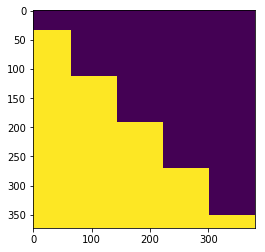

In [6]:
plt.imshow(img)
plt.show()

In [7]:
rows = np.array([], dtype=np.int)
cols = np.array([], dtype=np.int)

k_vals = np.array([-100, -50, -25, -10, -5, 0, 5, 10, 25, 50, 100, 1, 2, 3, -1, -2, -3], dtype=np.int)

for k in k_vals:
    A = sparse.eye(m=img.shape[0], n=img.shape[1], k=k)
    rows_ind, cols_ind = A.nonzero()
    rows = np.append(rows, rows_ind)
    cols = np.append(cols, cols_ind)
    
X = sparse.csr_matrix((img[(rows, cols)], (rows, cols)), shape=img.shape)

In [8]:
diags = np.arange(-99, 100, 10)
X = sparse.diags(diagonals=np.ones(diags.size), offsets=diags, shape=(100, 100))
X

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements (20 diagonals) in DIAgonal format>

In [11]:
a = ALS(k=5, lambda_=1, max_iter=100)

In [12]:
a.fit(X)

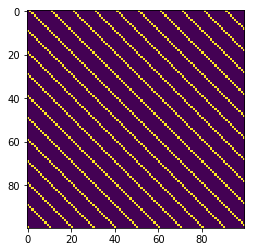

In [13]:
plt.imshow(X.toarray())
plt.show()

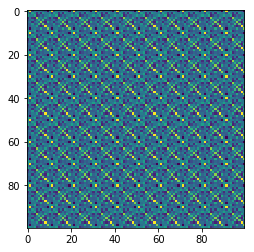

In [14]:
plt.imshow(a.predict())
plt.show()

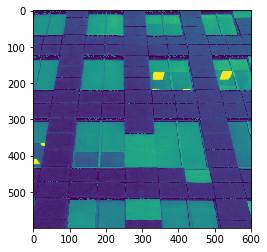

In [16]:
img = np.array(Image.open('sk.png'), dtype=np.float64)[:, :, 0]
img[img == 0] = 100
plt.imshow(img)
plt.show()

In [17]:
# random init
num = img.size // 10

np.random.seed(25)
row_ind = np.random.randint(0, img.shape[0], size=num)
col_ind = np.random.randint(0, img.shape[1], size=num)

row_ind = np.append(row_ind, np.arange(100))
col_ind = np.append(col_ind, np.arange(100))

X = sparse.csr_matrix((img[(row_ind, col_ind)], (row_ind, col_ind)), shape=img.shape)

for i in range(1, 5):
    X[X == 100 * i] = 100
    X[X == 255 * i] = 255

In [27]:
a = ALS(k=5, lambda_=1, max_iter=10)

In [28]:
a.fit(X)

0
1
2
3
4
5
6
7
8
9


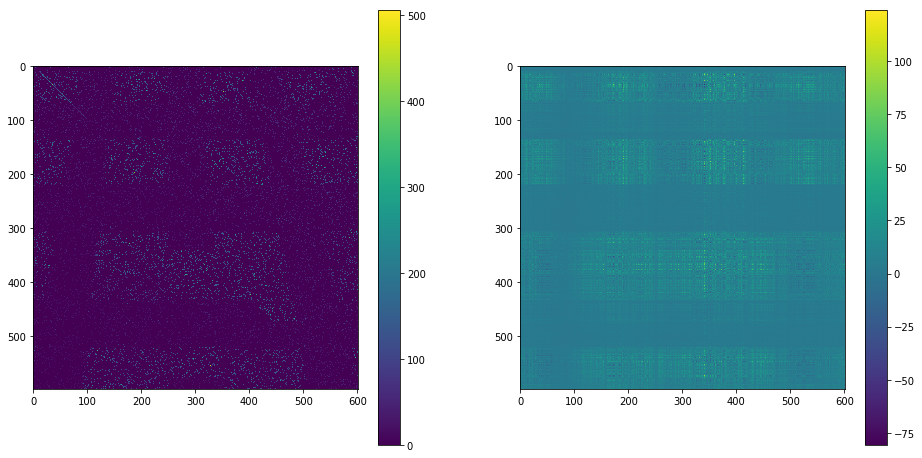

In [29]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(X.toarray())
plt.colorbar()

plt.subplot(122)
plt.imshow(a.predict())
plt.colorbar()
plt.show()

In [470]:
def sgd_fit(self, ratings):
        #initial assigning of factors X, Y
        X, Y = np.abs(np.random.rand(self._k, ratings.shape[0])), np.abs(np.random.rand(self._k, ratings.shape[1]))
            
        if self._missed_val == 'NaN':
            
            for i in range(self._max_iter):
                print(i)
                column_diff_norm = 0
                #flag shows that X and Y changed much, so we should not stop
                flag = True
                
                #choose random row of matrix ratings
                j = np.random.randint(0, ratings.shape[0])
                
                #take row in matrix of observations with which we will work
                row = ratings.getrow(j).toarray().ravel()

                #find arguments of elemnts in row which were not missed
                args = np.argwhere(~np.isnan(row)).T[0]
                
                #take one random element in row which was not missed
                arg = np.random.choice(args)

                #update the corresponding column of X and Y
                XTY = X[:,j].T.dot(Y[:,arg])
                new_X = X[:,j] - (2 / (i + 1)) * (row[arg] - XTY) * (Y[:,arg]) + self._lambda * (2 / (i + 1)) * X[:,j]
                new_Y = Y[:,arg] - (2 / (i + 1)) * (row[arg] - XTY) * (X[:,j]) + self._lambda * (2 / (i + 1)) * Y[:,arg]
                
                #compute norm of difference
                column_diff_norm += np.linalg.norm(X[:,j] - new_X) / np.linalg.norm(X[:,j])
                column_diff_norm += np.linalg.norm(Y[:,j] - new_Y) / np.linalg.norm(Y[:,j])
                
                X[:,j] = new_X
                Y[:,j] = new_Y
                
                #print('diff norm: ', column_diff_norm)
                if column_diff_norm < 1e-5:
                    break
            #save the results as the attribute of class
            self._X = X
            self._Y = Y
            self._error = column_diff_norm
        else:
            pass